# COVID-19 Data Visualization

### Using Pandas, Matplotlib.pyplot

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

#### specify data url, select country

In [128]:
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
country = 'Poland'

### Read and clean data

In [129]:
data = pd.read_csv(data_url, delimiter=',', header=0, quotechar='"', encoding="utf8", parse_dates=['date'])
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [130]:
countries = data[['location']]
countries = countries.drop_duplicates(subset = ['location'], keep='first')

In [133]:
data = data[data['location'] == country]
#  data[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million','reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million']] = data[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million','reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million']].fillna(0)
#  data = data.dropna(subset=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed'])
data = data.dropna(subset=['people_vaccinated'])
data = data.fillna(0)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
70630,POL,Europe,Poland,2020-12-28,1261010.0,3211.0,7668.143,27147.0,29.0,239.000,...,0.0,227.331,5.91,23.3,33.1,0.0,6.62,78.73,0.88,0.0
70631,POL,Europe,Poland,2020-12-29,1268634.0,7624.0,7729.857,27454.0,307.0,238.714,...,0.0,227.331,5.91,23.3,33.1,0.0,6.62,78.73,0.88,0.0
70632,POL,Europe,Poland,2020-12-30,1281414.0,12780.0,7790.143,28019.0,565.0,252.000,...,0.0,227.331,5.91,23.3,33.1,0.0,6.62,78.73,0.88,0.0
70633,POL,Europe,Poland,2020-12-31,1294878.0,13464.0,7840.000,28554.0,535.0,257.429,...,0.0,227.331,5.91,23.3,33.1,0.0,6.62,78.73,0.88,0.0
70635,POL,Europe,Poland,2021-01-02,1312780.0,7006.0,8403.286,29058.0,102.0,285.286,...,0.0,227.331,5.91,23.3,33.1,0.0,6.62,78.73,0.88,0.0


### Create plots

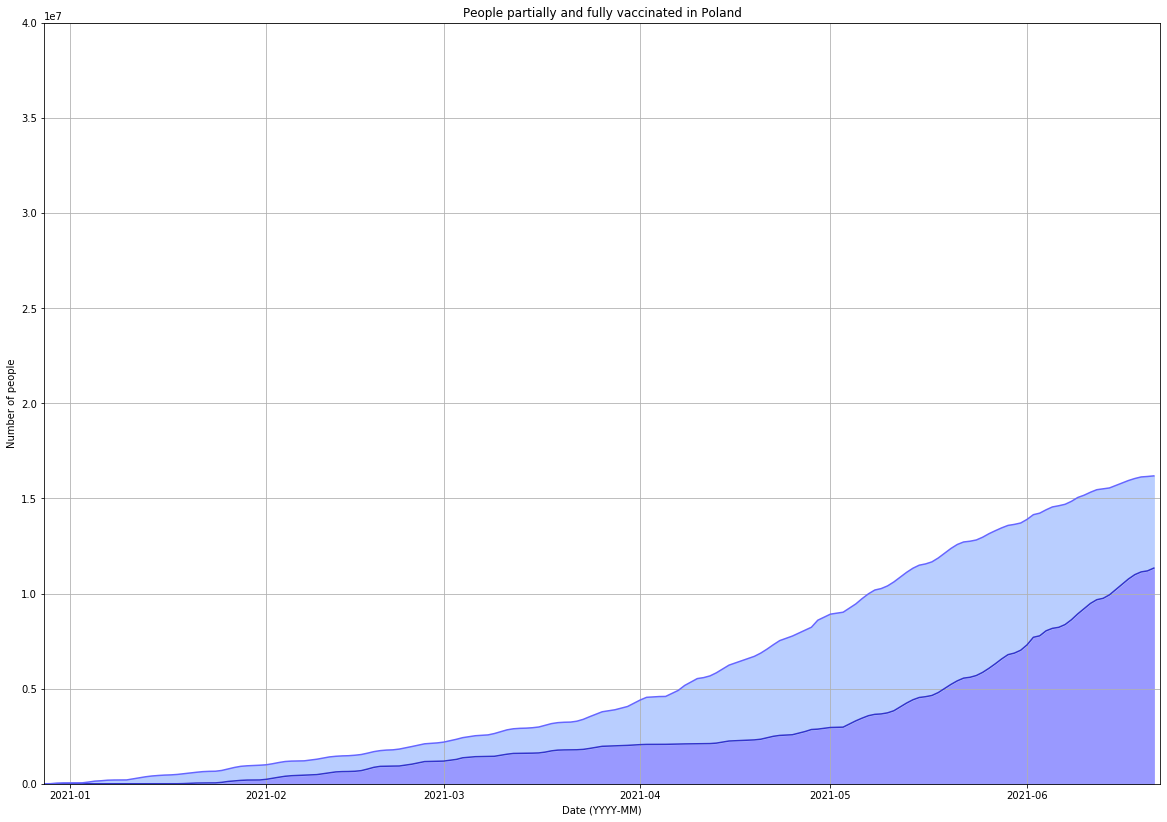

In [164]:
fig, ax = plt.subplots(figsize=(20, 14))



ax.plot(data['date'], data['people_fully_vaccinated'], color=(51/255, 51/255, 204/255, 255/255))
# Set title and labels for axes
ax.set(xlabel="Date (YYYY-MM)", ylabel="Number of people", title="People partially and fully vaccinated in " + country)
ax.fill_between(data['date'], data['people_fully_vaccinated'], color=(153/255, 153/255, 255/255, 255/255))


ax.plot(data['date'], data['people_vaccinated'], color=(102/255, 102/255, 255/255, 255/255))
# Set title and labels for axes
ax.fill_between(data['date'], data['people_vaccinated'], data['people_fully_vaccinated'], color=(185/255,206/255,255/255,255/255))
ax.set_xlim(datetime.date(2020, 12, 28), datetime.date.today())
ax.set_ylim(ymin = 0, ymax=40000000)
ax.grid()


plt.show()
